In [2]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("googlepay_user_simulated.csv")

Qs - How many users are one-time vs repeat users?

why - Helps define the size of the churn problem. 

In [3]:
# 1. One-time vs Repeat users
one_time_users = df[df['num_txns'] == 1]
repeat_users = df[df['num_txns'] > 1]
print("One-time users:", len(one_time_users))
print("Repeat users:", len(repeat_users))

One-time users: 506
Repeat users: 494


Qs -  What % of users are retained after 30 days?

why - Core KPI for retention

In [4]:
# 2. Retention rate
retention_rate = df['retained_30d'].value_counts(normalize=True) * 100
print("\nRetention rate:\n", retention_rate)



Retention rate:
 retained_30d
No     50.6
Yes    49.4
Name: proportion, dtype: float64


Qs - Do users who used offers churn less?

why - Tests whether promotions actually help

In [5]:
# 3. Retention by offer use
retention_by_offer = pd.crosstab(df['used_offer'], df['retained_30d'], normalize='index') * 100
print("\nRetention by offer:\n", retention_by_offer)


Retention by offer:
 retained_30d         No        Yes
used_offer                        
No            55.181347  44.818653
Yes           47.719870  52.280130


Qs - Is retention better on Android or iOS?

why - Helps product teams prioritize platforms

In [6]:
# 4. Retention by device
retention_by_device = pd.crosstab(df['device_os'], df['retained_30d'], normalize='index') * 100
print("\nRetention by device:\n", retention_by_device)



Retention by device:
 retained_30d         No        Yes
device_os                         
Android       50.972222  49.027778
iOS           49.642857  50.357143


Qs - What’s the avg transaction value by retention?

why - Ties product use to revenue (LTV)


In [7]:
# 5. Avg txn value by retention
avg_value_by_retention = df.groupby('retained_30d')['total_txn_value'].mean()
print("\nAvg transaction value:\n", avg_value_by_retention)


Avg transaction value:
 retained_30d
No      303.427885
Yes    1382.384474
Name: total_txn_value, dtype: float64


Qs - When do most users churn (early signups, late)?

why - Time-based patterns to design interventions


In [8]:
# 6. Signup patterns
df['signup_month'] = pd.to_datetime(df['signup_date']).dt.to_period('M')
signup_trend = df.groupby('signup_month')['retained_30d'].value_counts(normalize=True).unstack().fillna(0) * 100
print("\nSignup trend with retention:\n", signup_trend)



Signup trend with retention:
 retained_30d         No        Yes
signup_month                      
2023-01       50.980392  49.019608
2023-02       52.580645  47.419355
2023-03       48.348348  51.651652


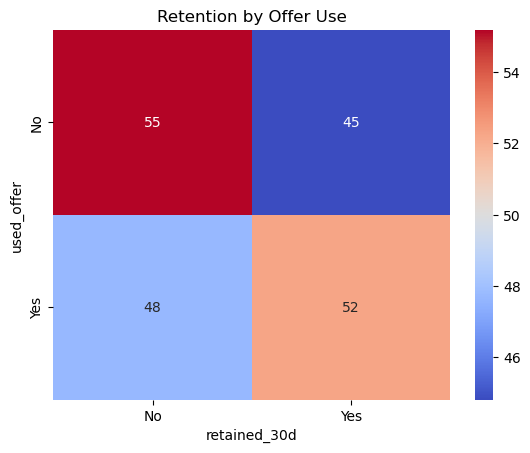

In [9]:
# Visualization - Retention by offer
sns.heatmap(retention_by_offer, annot=True, cmap='coolwarm')
plt.title("Retention by Offer Use")
plt.show()